
This file was built to solve numerically a classical PDE, 1D wave equation. The equation corresponds to :
$\dfrac{\partial}{\partial x} \left( \dfrac{\partial c^2 U}{\partial x} \right) = \dfrac{\partial^2 U}{\partial t^2}$
 
where
 - U represent the signal
 - x represent the position
 - t represent the time
 - c represent the velocity of the wave (depends on space parameters)

The numerical scheme is based on finite difference method. This program is also providing several boundary conditions. More particularly the Neumann, Dirichlet and Mur boundary conditions.
Copyright - © SACHA BINDER - 2021

In [77]:


############## MODULES IMPORTATION ###############
import numpy as np
import matplotlib.pyplot as plt
# import viz_tools    #self-developed module that groups animation functions

#Def of the initial condition    
def I(x):
    """
    Single space variable fonction that 
    represent the wave form at t = 0
    """
    return np.sin(x)



############## SET-UP THE PROBLEM ###############

#Def of velocity (spatial scalar field)
def celer(x):
    """
    constant velocity
    """
    return 1

# def celer(x):
#     """
#     Single space variable fonction that represent 
#     the wave's velocity at a position x
#     """
#     if x <=0.7:
#         return 1
#     else:
#         return 0.5
        
loop_exec = 1  # Processing loop execution flag

left_bound_cond = 1  #Boundary cond 1 : Dirichlet, 2 : Neumann, 3 Mur
right_bound_cond = 1  #Boundary cond 1 : Dirichlet, 2 : Neumann, 3 Mur

if left_bound_cond not in [1,2,3]:
    loop_exec = 0
    print("Please choose a correct left boundary condition")

if right_bound_cond not in [1,2,3]:
    loop_exec = 0
    print("Please choose a correct right boundary condition")



#Spatial mesh - i indices
L_x = np.pi #Range of the domain according to x [m]
dx = 0.01 #Infinitesimal distance
N_x = int(L_x/dx) #Points number of the spatial mesh
X = np.linspace(0,L_x,N_x+1) #Spatial array



#Temporal mesh with CFL < 1 - j indices
L_t = 6.28 #Duration of simulation [s]
dt = 0.01*dx  #Infinitesimal time with CFL (Courant–Friedrichs–Lewy condition)
N_t = int(L_t/dt) #Points number of the temporal mesh
T = np.linspace(0,L_t,N_t+1) #Temporal array



#Velocity array for calculation (finite elements)
c = np.zeros(N_x+1, float)
for i in range(0,N_x+1):
    c[i] = celer(X[i])




############## CALCULATION CONSTANTS ###############
c_1 = c[0]
c_2 = c[N_x]

C2 = (dt/dx)**2

CFL_1 = c_1*(dt/dx)
CFL_2 = c_2*(dt/dx)

In [78]:

############## PROCESSING LOOP ###############

if loop_exec:
    # $\forall i \in {0,...,N_x}$
    u_jm1 = np.zeros(N_x+1,float)   #Vector array u_i^{j-1}
    u_j = np.zeros(N_x+1,float)     #Vector array u_i^j
    u_jp1 = np.zeros(N_x+1,float)   #Vector array u_i^{j+1}
    
    q = np.zeros(N_x+1,float)
    q[0:N_x+1] = c[0:N_x+1]**2
    
    U = np.zeros((N_x+1,N_t+1),float) #Global solution
    
    #init cond - at t = 0
    u_j[0:N_x+1] = I(X[0:N_x+1])
    U[:,0] = u_j.copy()
    
    
    #init cond - at t = 1
    #without boundary cond
    u_jp1[1:N_x] =  u_j[1:N_x] + 0.5*C2*( 0.5*(q[1:N_x] + q[2:N_x+1])*(u_j[2:N_x+1] - u_j[1:N_x]) - 0.5*(q[0:N_x-1] + q[1:N_x])*(u_j[1:N_x] - u_j[0:N_x-1]))
    
    
    #left boundary conditions
    if left_bound_cond == 1:
        #Dirichlet bound cond
        u_jp1[0] = 0
        
    elif left_bound_cond == 2:
        #Nuemann bound cond
        #i = 0
        u_jp1[0] = u_j[0] + 0.5*C2*( 0.5*(q[0] + q[0+1])*(u_j[0+1] - u_j[0]) - 0.5*(q[0] + q[0+1])*(u_j[0] - u_j[0+1]))

    elif left_bound_cond == 3:
        #Mur bound cond
        #i = 0
        u_jp1[0] = u_j[1] + (CFL_1 -1)/(CFL_1 + 1)*( u_jp1[1] - u_j[0])

    
    
    #right boundary conditions
    if right_bound_cond == 1:
        #Dirichlet bound cond
        u_jp1[N_x] = 0
        
        
    elif right_bound_cond == 2:
        #Nuemann bound cond
        #i = N_x
        u_jp1[N_x] =  u_j[N_x] + 0.5*C2*( 0.5*(q[N_x-1] + q[N_x])*(u_j[N_x-1] - u_j[N_x]) - 0.5*(q[N_x-1] + q[N_x])*(u_j[N_x] - u_j[i-1]))
        
        
    elif right_bound_cond == 3:
        #Mur bound cond
        #i = N_x
        u_jp1[N_x] = u_j[N_x-1] + (CFL_2 -1)/(CFL_2 + 1)*(u_jp1[N_x-1] - u_j[N_x])
    
    u_jm1 = u_j.copy()  #go to the next step
    u_j = u_jp1.copy()  #go to the next step
    U[:,1] = u_j.copy()
    
    
    #Process loop (on time mesh)
    for j in range(1, N_t):
        #calculation at step j+1
        #without boundary cond
        u_jp1[1:N_x] = -u_jm1[1:N_x] + 2*u_j[1:N_x] + C2*( 0.5*(q[1:N_x] + q[2:N_x+1])*(u_j[2:N_x+1] - u_j[1:N_x]) - 0.5*(q[0:N_x-1] + q[1:N_x])*(u_j[1:N_x] - u_j[0:N_x-1]))
           
        
        #left bound conditions
        if left_bound_cond == 1:
            #Dirichlet bound cond
            u_jp1[0] = 0

        elif left_bound_cond == 2:
            #Nuemann bound cond
            #i = 0
            u_jp1[0] = -u_jm1[0] + 2*u_j[0] + C2*( 0.5*(q[0] + q[0+1])*(u_j[0+1] - u_j[0]) - 0.5*(q[0] + q[0+1])*(u_j[0] - u_j[0+1]))       
            
        elif left_bound_cond == 3:
            #Mur bound cond
            #i = 0
            u_jp1[0] = u_j[1] + (CFL_1 -1)/(CFL_1 + 1)*( u_jp1[1] - u_j[0])



        #right bound conditions
        if right_bound_cond == 1:
            #Dirichlet bound cond
            u_jp1[N_x] = 0
            
        elif right_bound_cond == 2:
            #Nuemann bound cond
            #i = N_x
            u_jp1[N_x] = -u_jm1[N_x] + 2*u_j[N_x] + C2*( 0.5*(q[N_x-1] + q[N_x])*(u_j[N_x-1] - u_j[N_x]) - 0.5*(q[N_x-1] + q[N_x])*(u_j[N_x] - u_j[N_x-1]))
            
        elif right_bound_cond == 3:
            #Mur bound cond
            #i = N_x
            u_jp1[N_x] = u_j[N_x-1] + (CFL_2 -1)/(CFL_2 + 1)*(u_jp1[N_x-1] - u_j[N_x])

       
        
        u_jm1[:] = u_j.copy()   #go to the next step
        u_j[:] = u_jp1.copy()   #go to the next step
        U[:,j] = u_j.copy()



In [ ]:

############## MODULES IMPORTATION ###############
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from scipy import meshgrid
import os


In [49]:
##################################################

def anim_1D(x,y, pas_de_temps, pas_d_images, save = False, myxlim = (0, 4) , myylim = (-4,4)):
    """
    Function allowing to display an annimation based on calculation result with a given time step. This function can be used to save the images sequence in the current directory.
    
    The y parameter is a list containing several functions to display : y = [ [f_1(x)], ... , [f_n(x)] ].
    
    (x:np.ndarray (format 1D), y:np.ndarray (format 2D), pas_de_temps:float , pas_d_images:int, save:bool , myxlim:tuple , myylim:tuple) -> plot (+ .mp4)
    """
    
    
    fig = plt.figure()
    ax = plt.axes(xlim= myxlim , ylim= myylim)
    line, = ax.plot([], [])
    ax.set_title("t = 0 s", fontname = "serif", fontsize = 16)
    ax.set_xlabel("x [m]", fontname = "serif", fontsize = 14)
    ax.set_ylabel("$u$ [m]", fontname = "serif", fontsize = 14)
    def init():
        line.set_data([],[])
        return line,
    
    # animation function.  This is called sequentially
    def animate(i):
        line.set_data(x, y[:,pas_d_images*i])
        ax.set_title("$u(x)$ à t = {} s".format(np.round(i*pas_d_images*pas_de_temps, 4)), fontname = "serif", fontsize = 16)
        return line,
        
    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=y.shape[1]//pas_d_images, interval=10, blit=True)

    if save:
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=60, metadata=dict(artist='Me'), bitrate=1800)

        anim.save('lines.mp4', writer=writer)

    return anim
    
##################################################

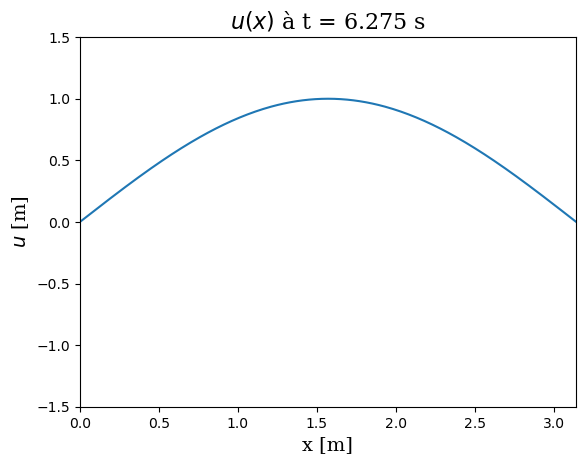

In [50]:
anim_1D(X,U, dt, 50, save = True , myxlim = (0, 3.14) , myylim = (-1.5,1.5))
plt.show()

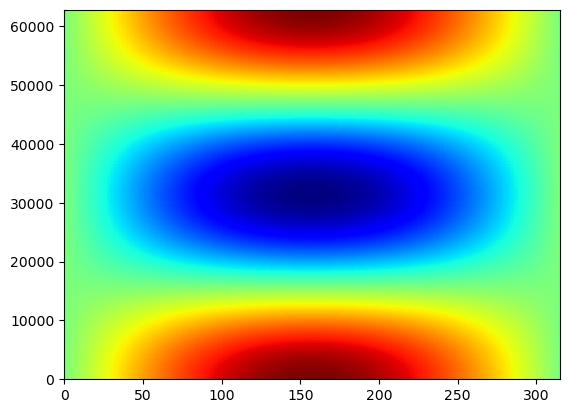

In [80]:
plt.pcolormesh(U.T,cmap='jet')